In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import os
print(os.listdir("./EPA_DATA"))

['OZONE_AGG.csv', 'gases_aggregation.csv']


In [2]:
data = pd.read_csv('./EPA_DATA/gases_aggregation.csv',encoding= 'unicode_escape')
data['year_month'] =  pd.to_datetime(data['year_month'])


In [3]:
data['year_month'] =  pd.to_datetime(data['year_month'])

data.head(10)

,County_Name,State_Name,year_month,NO,CO,so2,Ozone
0,Adair,Oklahoma,2009-11-01,3.320972,0.163916,1.097742,0.032276
1,Adams,Colorado,1998-01-01,32.520622,1.059219,3.648788,0.009807
2,Adams,Colorado,2011-02-01,20.709092,0.278834,0.723943,0.021486
3,Adams,Colorado,2012-12-01,26.404077,0.439758,1.551775,0.015365
4,Allegheny,Pennsylvania,1992-02-01,26.362409,1.228231,17.689172,0.018739
5,Allegheny,Pennsylvania,2002-07-01,16.432743,0.390117,7.905726,0.045830
6,Anoka,Minnesota,2004-05-01,6.602465,0.106466,0.750132,0.035333
7,BAJA CALIFORNIA NORTE,Country Of Mexico,1998-03-01,18.669883,1.379702,2.039614,0.029113
8,Baltimore,Maryland,1990-04-01,22.928991,0.592707,9.416851,0.031340
9,Baltimore,Maryland,2011-04-01,8.833712,0.169506,0.870098,0.034805


In [115]:
data.County_Name.unique()

array(['Adair', 'Adams', 'Allegheny', 'Anoka', 'BAJA CALIFORNIA NORTE',
       'Baltimore', 'Baltimore (City)', 'Beaver', 'Bergen', 'Berks',
       'Bexar', 'Blair', 'Blount', 'Boyd', 'Bronx', 'Broward', 'Bucks',
       'Camden', 'Charleston', 'Chittenden', 'Clark', 'Clay', 'Cook',
       'Cumberland', 'Cuyahoga', 'Dallas', 'Dauphin', 'Davidson', 'Davis',
       'DeKalb', 'Denver', 'Dona Ana', 'Duval', 'El Paso', 'Erie',
       'Essex', 'Fairfax', 'Fairfield', 'Fayette', 'Forsyth', 'Fresno',
       'Greenbrier', 'Hamilton', 'Hampden', 'Hampton City', 'Harris',
       'Hartford', 'Haywood', 'Hillsborough', 'Hudson', 'Imperial',
       'Jefferson', 'Kanawha', 'King', 'Lackawanna', 'Lancaster',
       'Los Angeles', 'Maricopa', 'Marion', 'Miami-Dade', 'Middlesex',
       'Milwaukee', 'Monroe', 'Montgomery', 'Morgan', 'Morris',
       'Multnomah', 'Nassau', 'New Castle', 'New Haven', 'New York',
       'Northampton', 'Oklahoma', 'Orange', 'Palm Beach', 'Philadelphia',
       'Pima', 'Pinel

Since I am planning to do simulation at a city level, picking a specific city

In [100]:
city_data = data[data.County_Name=='Cupertino'].sort_values(by=['year_month'])
city_data = city_data.set_index("year_month")
city_data = city_data.drop('County_Name',1)
city_data = city_data.drop('State_Name',1)

KeyError: "None of ['year_month'] are in the columns"

In [119]:
city_data.tail(10)

,NO,CO,so2,Ozone
year_month,,,,
2018-09-01,9.879772,0.369289,1.057192,0.022221
2018-10-01,11.525962,0.357555,1.212411,0.018454
2018-11-01,12.295194,0.362686,0.669371,0.015285
2018-12-01,15.345136,0.454568,0.785670,0.012865
2019-01-01,14.409647,0.411670,0.610717,0.020886
2019-02-01,16.286705,0.414050,0.953474,0.025253
2019-03-01,16.224222,0.414789,1.320464,0.033023
2019-04-01,11.935069,0.407728,1.492257,0.034746
2019-05-01,13.036759,0.420014,1.542651,0.030125


In [120]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1980-01-01 to 2019-06-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NO      365 non-null    float64
 1   CO      365 non-null    float64
 2   so2     365 non-null    float64
 3   Ozone   365 non-null    float64
dtypes: float64(4)
memory usage: 14.3 KB


<Figure size 1440x720 with 0 Axes>

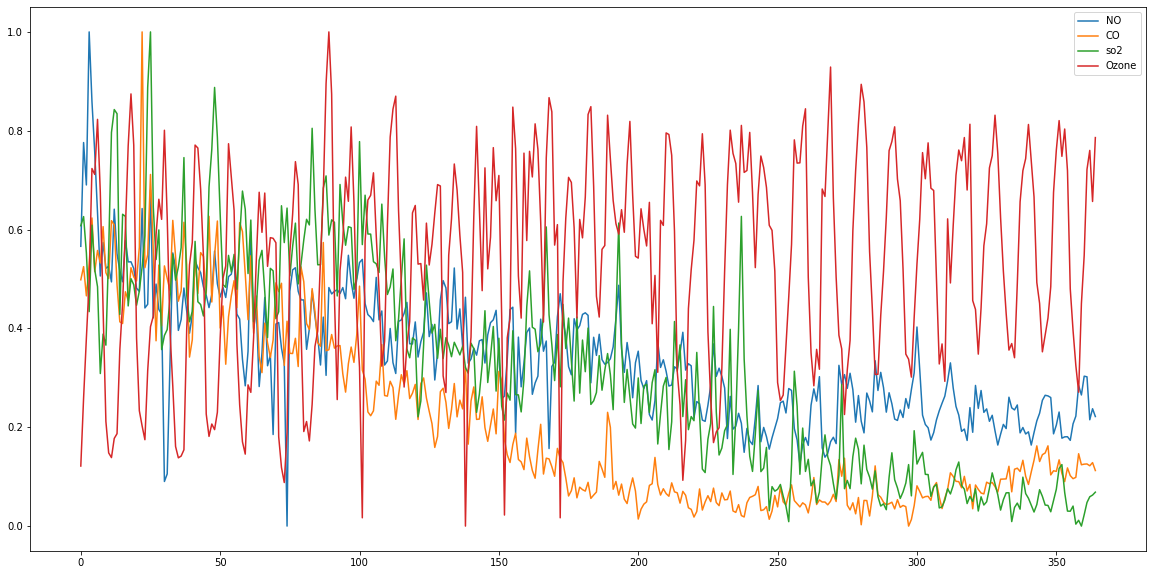

In [121]:
from sklearn import preprocessing

plt.figure(figsize=(20,10))
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(city_data)
df_normalized = pd.DataFrame(np_scaled, columns = city_data.columns)
df_normalized

df_normalized.plot(figsize=(20,10))


In [122]:
from scipy.stats import norm
log_change = np.log(1 + city_data.CO.pct_change())
u = log_change.mean() #Mean of the logarithmich change
var = log_change.var() #Variance
drift = u - (0.5 * var) #drift / trend
stdev = log_change.std() #Standard deviation


t_intervals = 250 #forecast 250 years
iterations = 10 #10 different simulation each year

daily_change = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

In [123]:
daily_change

array([[1.69855025, 1.50609396, 0.8370662 , ..., 0.81982427, 0.98839603,
        1.14258206],
       [0.69133224, 1.35387397, 1.04573944, ..., 0.80861905, 0.89511789,
        1.08496116],
       [0.78484817, 1.15587153, 1.06674161, ..., 0.77580547, 0.97492389,
        0.77070066],
       ...,
       [0.73702773, 0.86197844, 0.97669192, ..., 0.85899675, 0.69919537,
        0.83046882],
       [0.76564973, 0.78735895, 0.950434  , ..., 0.70640663, 1.12045258,
        1.05208434],
       [0.81671752, 0.89185621, 0.85593455, ..., 1.06518425, 0.9337709 ,
        1.38713602]])

In [124]:
from dateutil.relativedelta import relativedelta

last_co2 = city_data.CO.iloc[-1]
last_co2
last_year = city_data.index[-1]
last_year
years = np.array([ [last_year + relativedelta(months=+i)] for i in range(t_intervals)])
years

array([[Timestamp('2019-06-01 00:00:00')],
       [Timestamp('2019-07-01 00:00:00')],
       [Timestamp('2019-08-01 00:00:00')],
       [Timestamp('2019-09-01 00:00:00')],
       [Timestamp('2019-10-01 00:00:00')],
       [Timestamp('2019-11-01 00:00:00')],
       [Timestamp('2019-12-01 00:00:00')],
       [Timestamp('2020-01-01 00:00:00')],
       [Timestamp('2020-02-01 00:00:00')],
       [Timestamp('2020-03-01 00:00:00')],
       [Timestamp('2020-04-01 00:00:00')],
       [Timestamp('2020-05-01 00:00:00')],
       [Timestamp('2020-06-01 00:00:00')],
       [Timestamp('2020-07-01 00:00:00')],
       [Timestamp('2020-08-01 00:00:00')],
       [Timestamp('2020-09-01 00:00:00')],
       [Timestamp('2020-10-01 00:00:00')],
       [Timestamp('2020-11-01 00:00:00')],
       [Timestamp('2020-12-01 00:00:00')],
       [Timestamp('2021-01-01 00:00:00')],
       [Timestamp('2021-02-01 00:00:00')],
       [Timestamp('2021-03-01 00:00:00')],
       [Timestamp('2021-04-01 00:00:00')],
       [Tim

In [125]:
co2_list = np.zeros_like(daily_change)
co2_list[0] = last_co2
co2_list.shape
years.shape

(250, 1)

In [126]:
# With a simple for loop, we are going to forecast the next 250 years
for t in range(1, t_intervals):
    co2_list[t] = co2_list[t - 1] * daily_change[t]
co2_list = np.append(co2_list, years, axis=1)
co2_list = pd.DataFrame(co2_list)
co2_list['CO'] = co2_list[0]
co2_list['Year'] = co2_list[iterations]
co2_list = co2_list.drop(co2_list.columns[iterations], axis=1)
co2_list.head()

,0,1,2,3,4,5,6,7,8,9,CO,Year
0,0.3892,0.3892,0.3892,0.3892,0.3892,0.3892,0.3892,0.3892,0.3892,0.3892,0.3892,2019-06-01
1,0.269066,0.526928,0.407002,0.379267,0.509027,0.379209,0.297854,0.314714,0.34838,0.422267,0.269066,2019-07-01
2,0.211176,0.609061,0.434166,0.455418,0.5189,0.269268,0.28411,0.244157,0.339644,0.325441,0.211176,2019-08-01
3,0.232383,0.734421,0.395642,0.567341,0.458066,0.26543,0.362849,0.216726,0.437283,0.449022,0.232383,2019-09-01
4,0.245024,0.72384,0.557758,0.653336,0.416789,0.320112,0.364254,0.188065,0.311033,0.472725,0.245024,2019-10-01


In [127]:
co2_list = co2_list.set_index("Year")

In [128]:
CO = city_data.CO
CO = pd.DataFrame(CO)
frames = [CO, co2_list]
monte_carlo_forecast = pd.concat(frames)

In [129]:
monte_carlo_forecast.head()

,CO,0,1,2,3,4,5,6,7,8,9
1980-01-01,1.13087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-01,1.18199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-01,1.06841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-01,1.19136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-05-01,1.37123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
monte_carlo_forecast.tail()

,CO,0,1,2,3,4,5,6,7,8,9
2039-11-01,0.00075072,0.00075072,0.370869,0.0425212,0.00107864,0.00105462,0.000225734,0.0591098,0.0896158,0.487093,0.0149328
2039-12-01,0.00082381,0.00082381,0.312959,0.0376346,0.00112743,0.001374,0.0002299,0.0635371,0.0957347,0.533874,0.0184215
2040-01-01,0.000607171,0.000607171,0.269764,0.0367574,0.00108594,0.00122818,0.000197033,0.0637601,0.0822358,0.373283,0.0152985
2040-02-01,0.00046488,0.00046488,0.212401,0.0349355,0.00113382,0.000941242,0.000158033,0.0463094,0.0580919,0.418245,0.0160953
2040-03-01,0.000379676,0.000379676,0.189431,0.0299025,0.00138727,0.000854381,0.000101527,0.0449639,0.0618786,0.390545,0.0223264


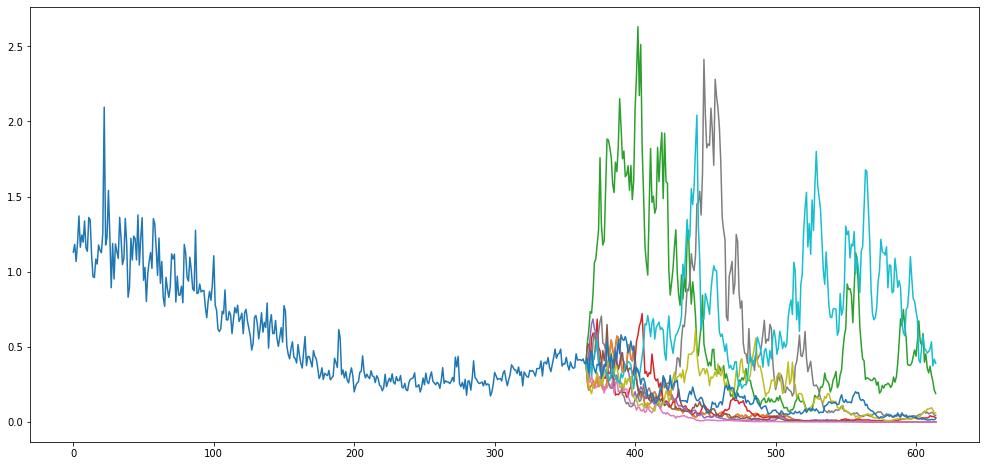

In [131]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.show()

In [140]:
city_data = data[data.County_Name=='Imperial'].sort_values(by=['year_month'])
city_data = city_data.set_index("year_month")

In [74]:
data.County_Name.unique()

array(['Adair', 'Adams', 'Allegheny', 'Anoka', 'BAJA CALIFORNIA NORTE',
       'Baltimore', 'Baltimore (City)', 'Beaver', 'Bergen', 'Berks',
       'Bexar', 'Blair', 'Blount', 'Boyd', 'Bronx', 'Broward', 'Bucks',
       'Camden', 'Charleston', 'Chittenden', 'Clark', 'Clay', 'Cook',
       'Cumberland', 'Cuyahoga', 'Dallas', 'Dauphin', 'Davidson', 'Davis',
       'DeKalb', 'Denver', 'Dona Ana', 'Duval', 'El Paso', 'Erie',
       'Essex', 'Fairfax', 'Fairfield', 'Fayette', 'Forsyth', 'Fresno',
       'Greenbrier', 'Hamilton', 'Hampden', 'Hampton City', 'Harris',
       'Hartford', 'Haywood', 'Hillsborough', 'Hudson', 'Imperial',
       'Jefferson', 'Kanawha', 'King', 'Lackawanna', 'Lancaster',
       'Los Angeles', 'Maricopa', 'Marion', 'Miami-Dade', 'Middlesex',
       'Milwaukee', 'Monroe', 'Montgomery', 'Morgan', 'Morris',
       'Multnomah', 'Nassau', 'New Castle', 'New Haven', 'New York',
       'Northampton', 'Oklahoma', 'Orange', 'Palm Beach', 'Philadelphia',
       'Pima', 'Pinel

In [4]:
data = data.set_index("year_month")
data.index = pd.DatetimeIndex(data.index).to_period('M')

co_data = data[data.County_Name=='Imperial'].sort_values(by=['year_month'])[['CO']]
co_data.head()

,CO
year_month,
1994-06,0.859227
1994-07,0.558518
1994-08,0.491435
1994-09,0.765011
1994-10,1.438501


In [5]:
co_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 293 entries, 1994-06 to 2019-04
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO      293 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


In [6]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16
pd.plotting.deregister_matplotlib_converters()

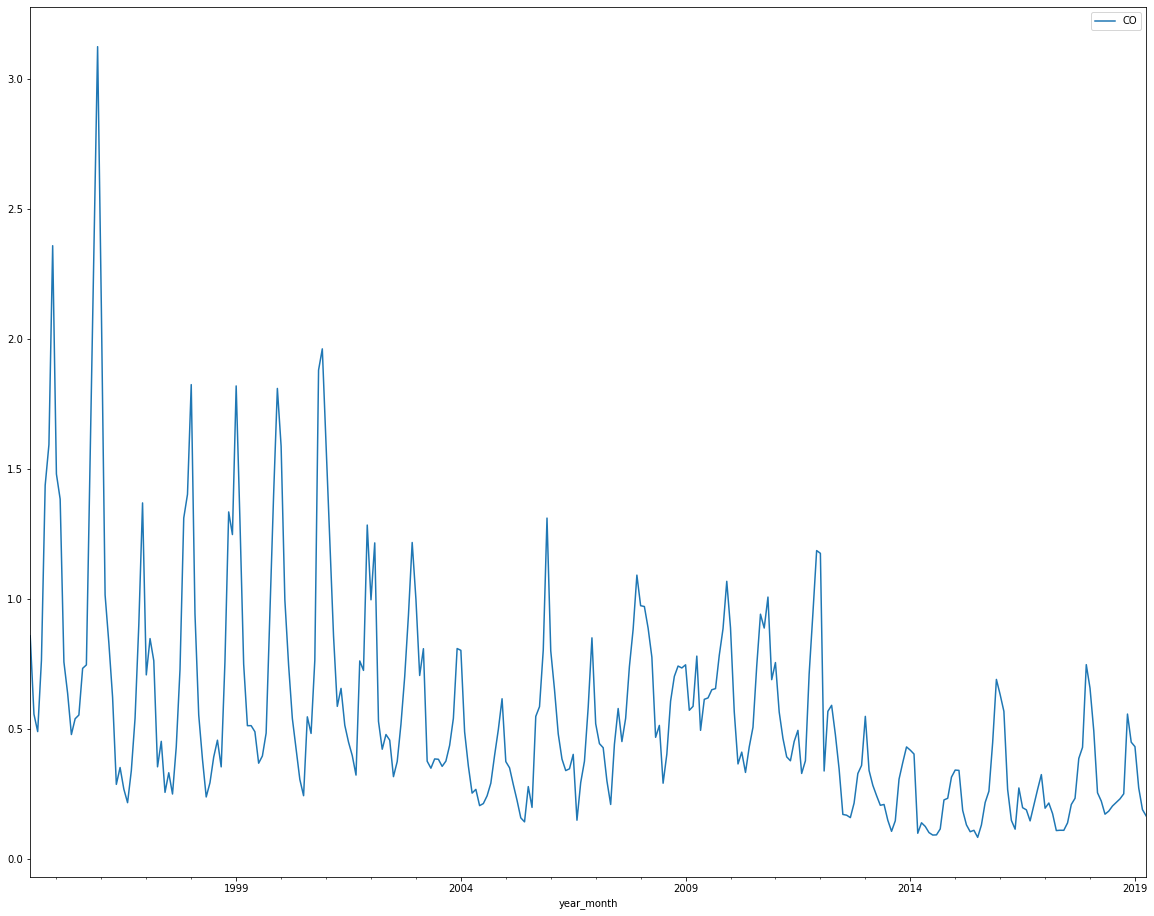

In [7]:
co_data.plot()
plt.show()

In [8]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    ts.plot(color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Time in Years', fontsize = 25)
    plt.ylabel('Total Emissions', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [9]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        

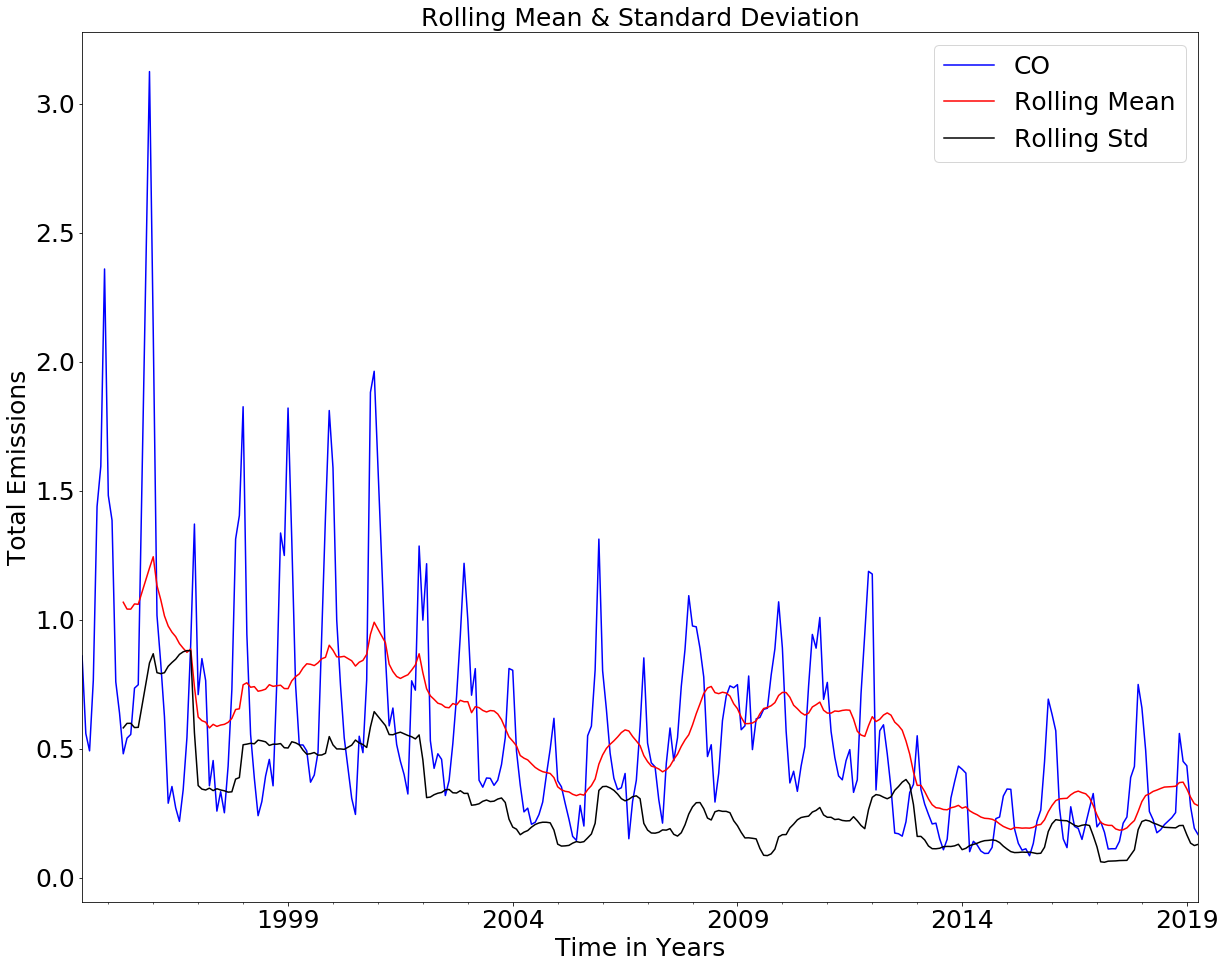

In [10]:
TestStationaryPlot(co_data)

In [11]:
TestStationaryAdfuller(co_data)

Test Statistic                  -2.111130
p-value                          0.240063
#Lags Used                      12.000000
Number of Observations Used    280.000000
Critical Value (1%)             -3.453922
Critical Value (5%)             -2.871918
Critical Value (10%)            -2.572300
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


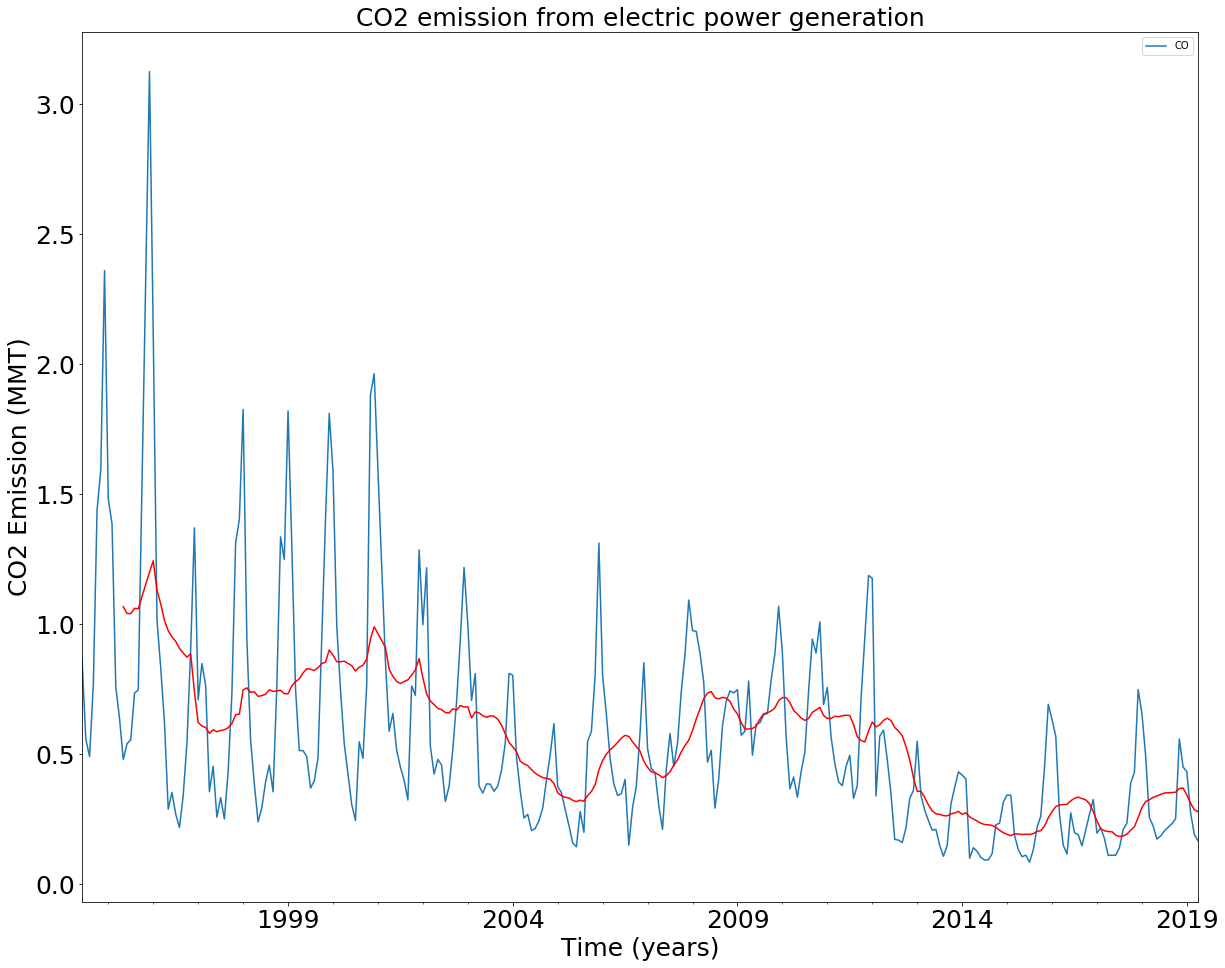

In [12]:
moving_avg = co_data.rolling(12).mean()
co_data.plot()
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('CO2 Emission (MMT)', fontsize = 25)
plt.title('CO2 emission from electric power generation', fontsize = 25)
plt.show()

In [13]:
mte_moving_avg_diff = co_data - moving_avg
mte_moving_avg_diff.head(13)

,CO
year_month,
1994-06,NaN
1994-07,NaN
1994-08,NaN
1994-09,NaN
1994-10,NaN
1994-11,NaN
1994-12,NaN
1995-01,NaN
1995-02,NaN


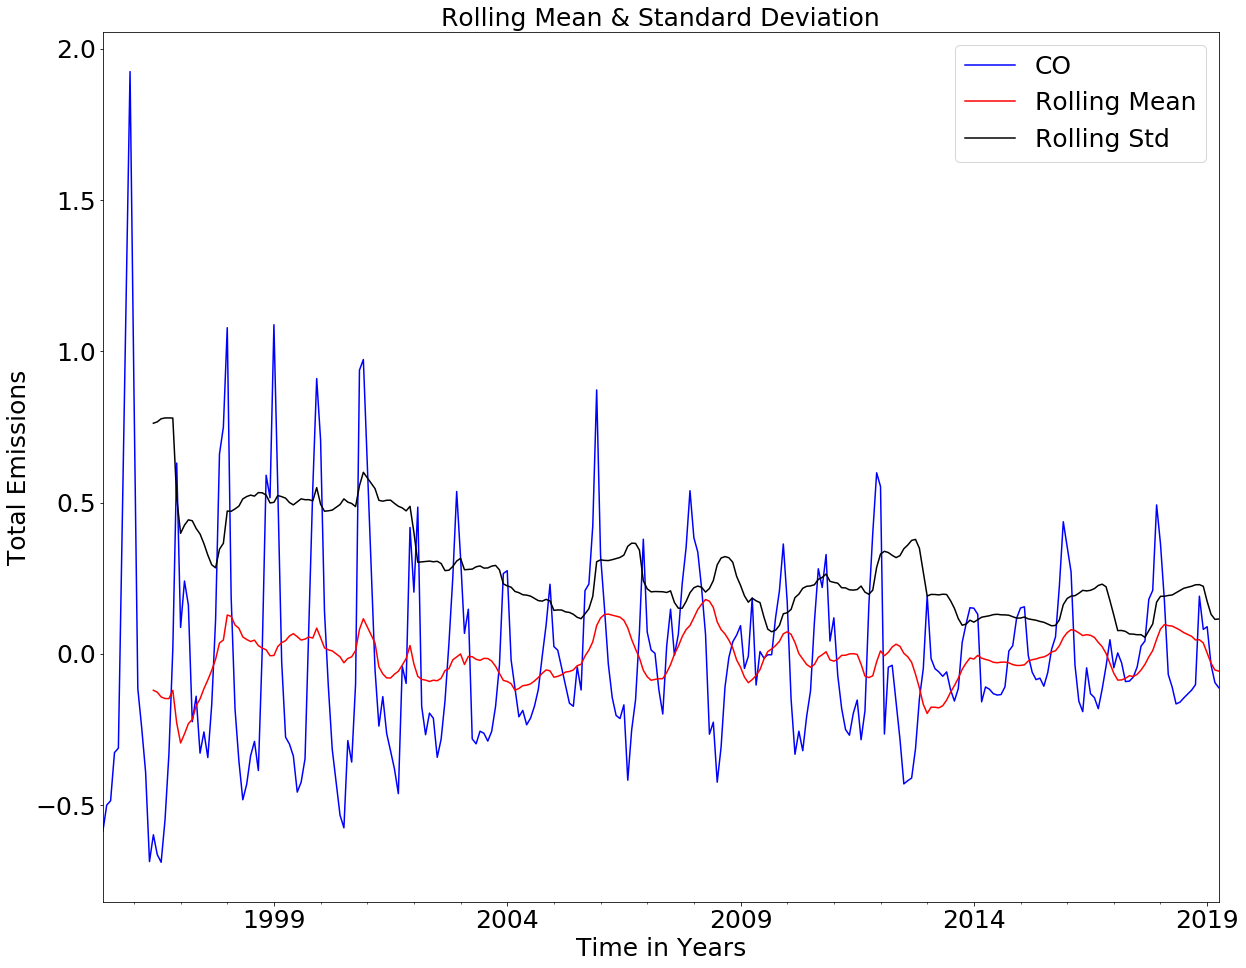

In [14]:
mte_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(mte_moving_avg_diff)

In [15]:
TestStationaryAdfuller(mte_moving_avg_diff)

Test Statistic                  -5.327984
p-value                          0.000005
#Lags Used                      14.000000
Number of Observations Used    267.000000
Critical Value (1%)             -3.455081
Critical Value (5%)             -2.872427
Critical Value (10%)            -2.572571
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


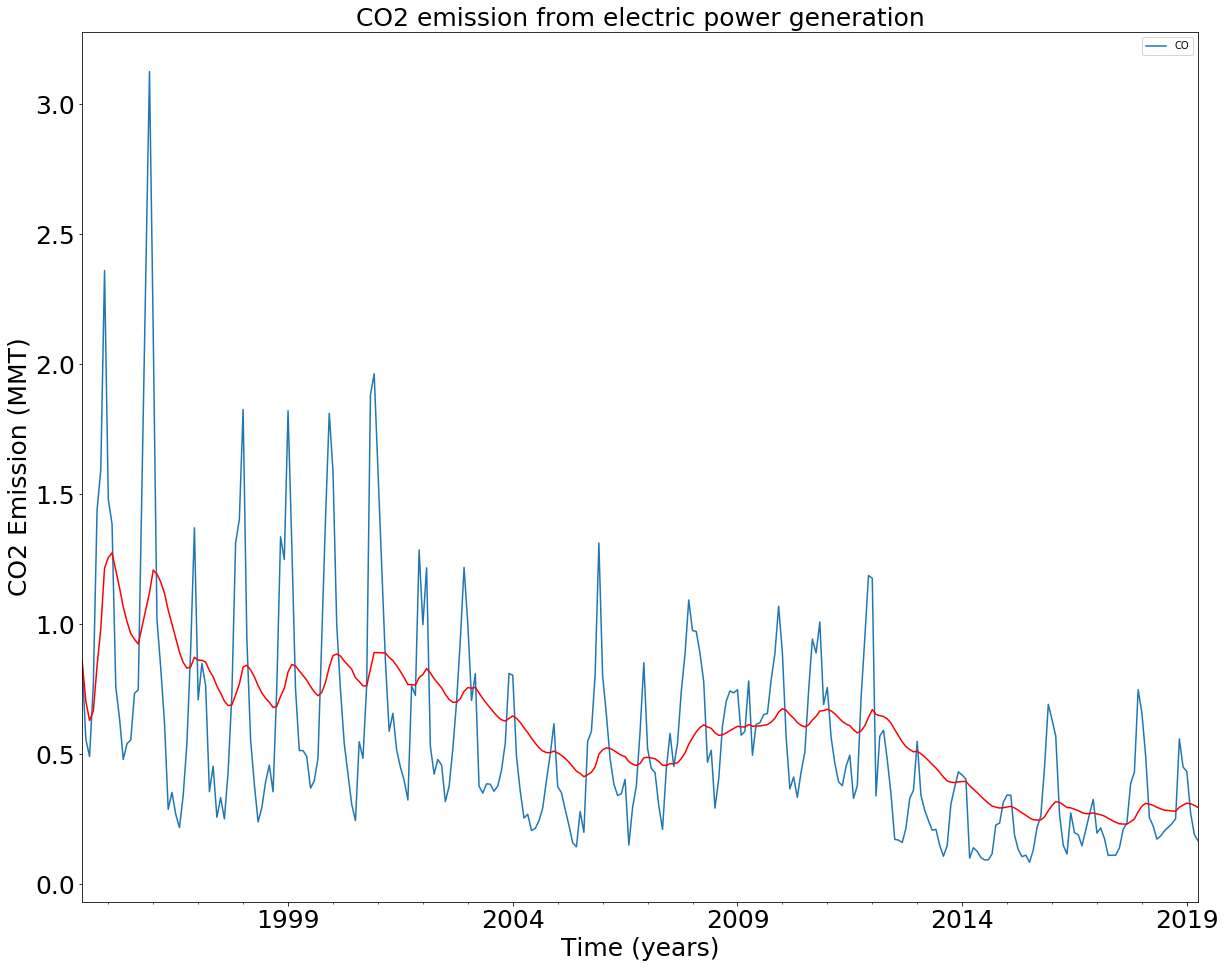

In [16]:
mte_exp_wighted_avg = co_data.ewm(halflife=12).mean()
co_data.plot()
plt.plot(mte_exp_wighted_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('CO2 Emission (MMT)', fontsize = 25)
plt.title('CO2 emission from electric power generation', fontsize = 25)
plt.show()

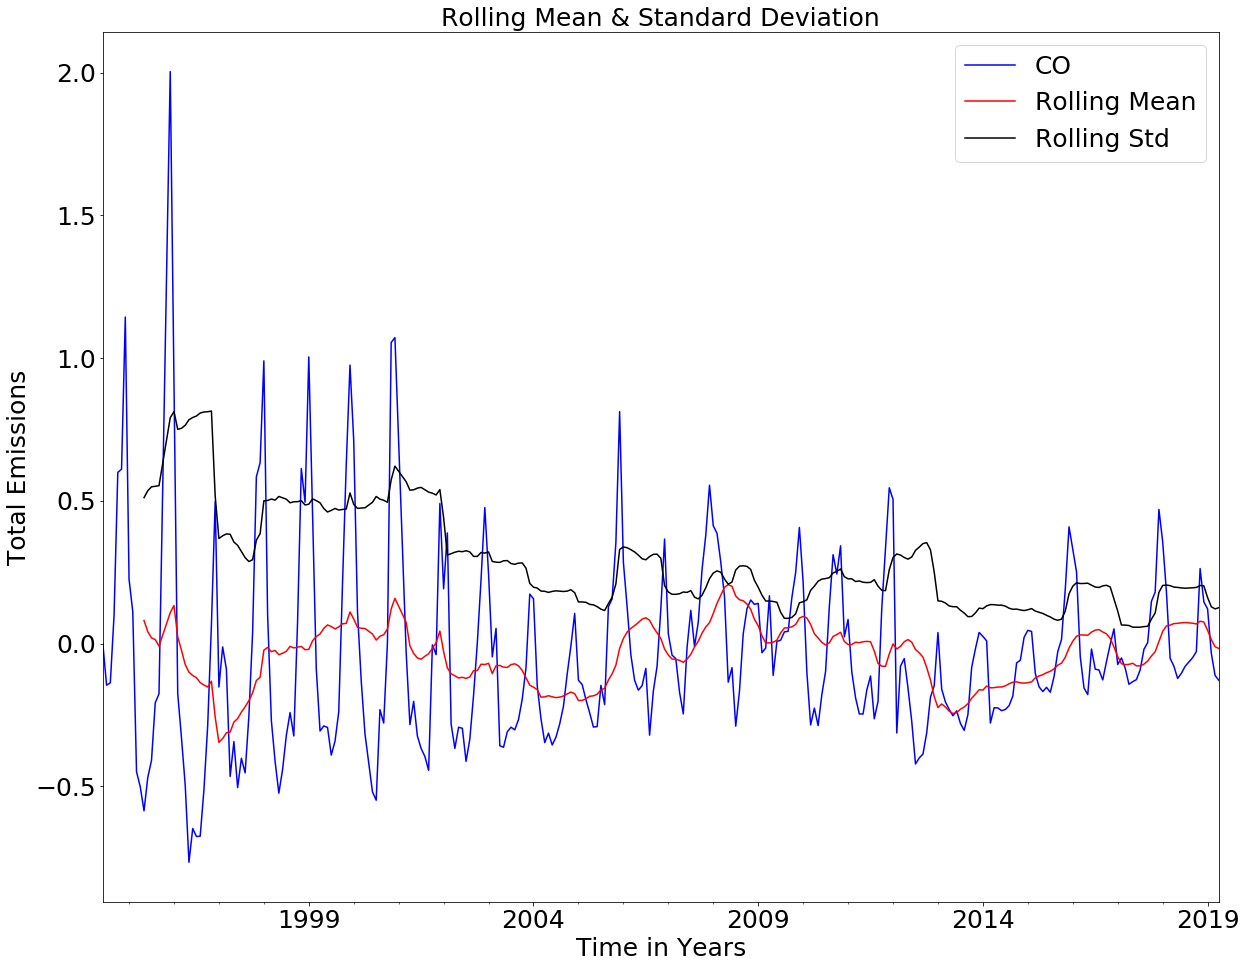

In [17]:
mte_ewma_diff = co_data - mte_exp_wighted_avg
TestStationaryPlot(mte_ewma_diff)

In [18]:
TestStationaryAdfuller(mte_ewma_diff)

Test Statistic                  -3.250201
p-value                          0.017257
#Lags Used                      12.000000
Number of Observations Used    280.000000
Critical Value (1%)             -3.453922
Critical Value (5%)             -2.871918
Critical Value (10%)            -2.572300
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


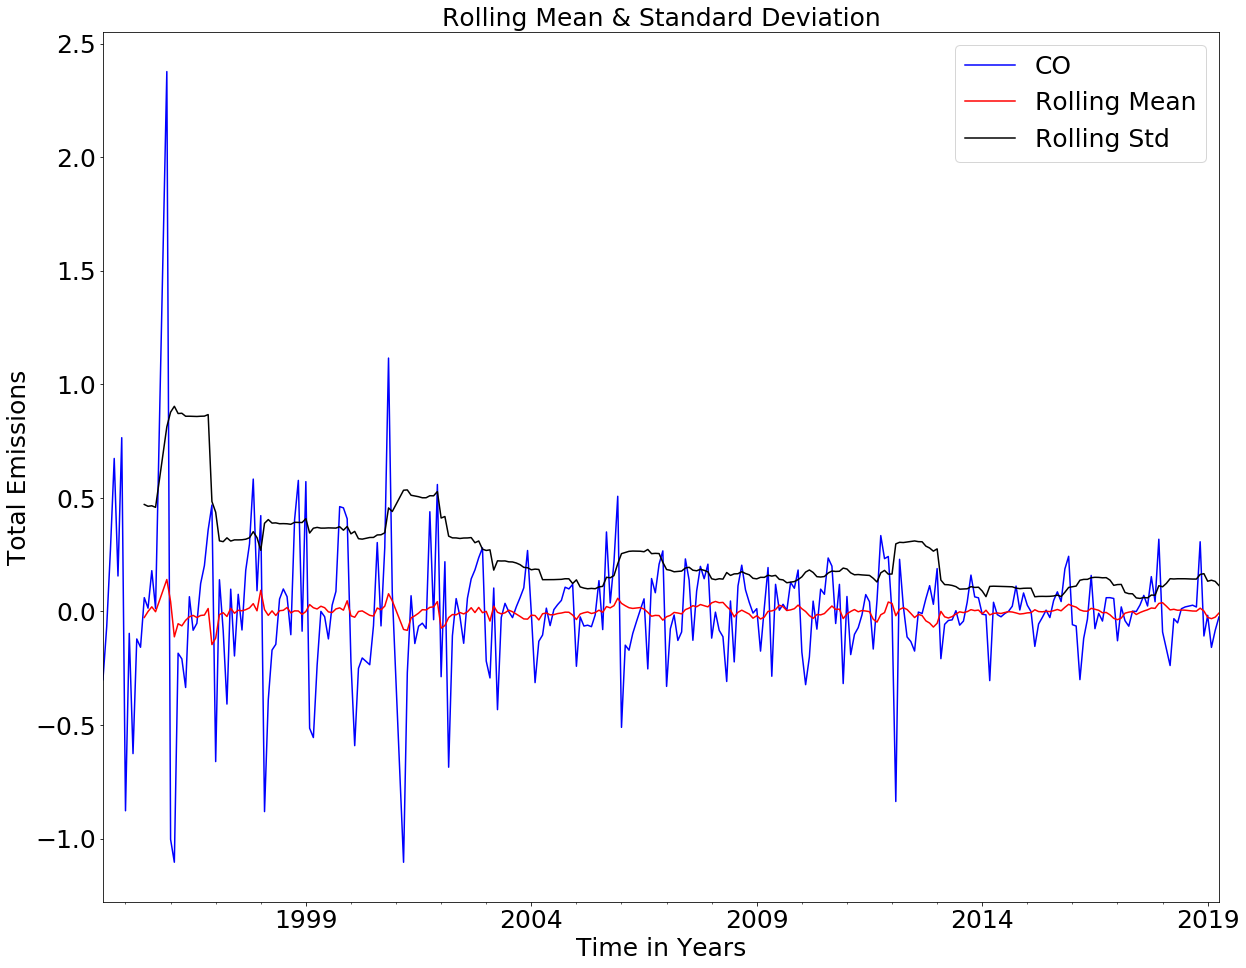

In [19]:
mte_first_difference = co_data - co_data.shift(1)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False))

In [20]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

Test Statistic                -8.325523e+00
p-value                        3.479115e-13
#Lags Used                     1.100000e+01
Number of Observations Used    2.800000e+02
Critical Value (1%)           -3.453922e+00
Critical Value (5%)           -2.871918e+00
Critical Value (10%)          -2.572300e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


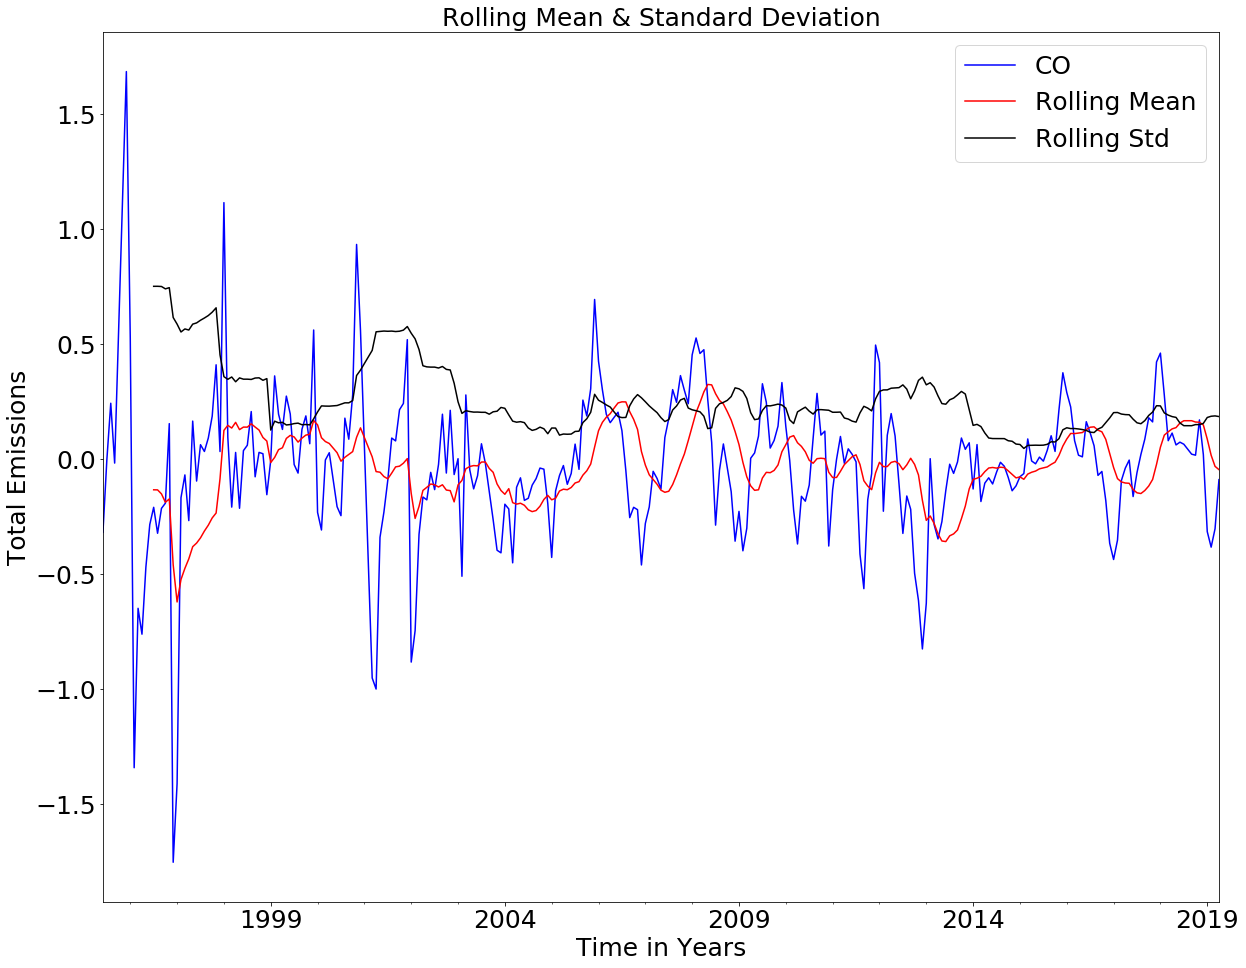

Test Statistic                  -4.826129
p-value                          0.000048
#Lags Used                      13.000000
Number of Observations Used    267.000000
Critical Value (1%)             -3.455081
Critical Value (5%)             -2.872427
Critical Value (10%)            -2.572571
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [21]:
mte_seasonal_difference = co_data - co_data.shift(12)  
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

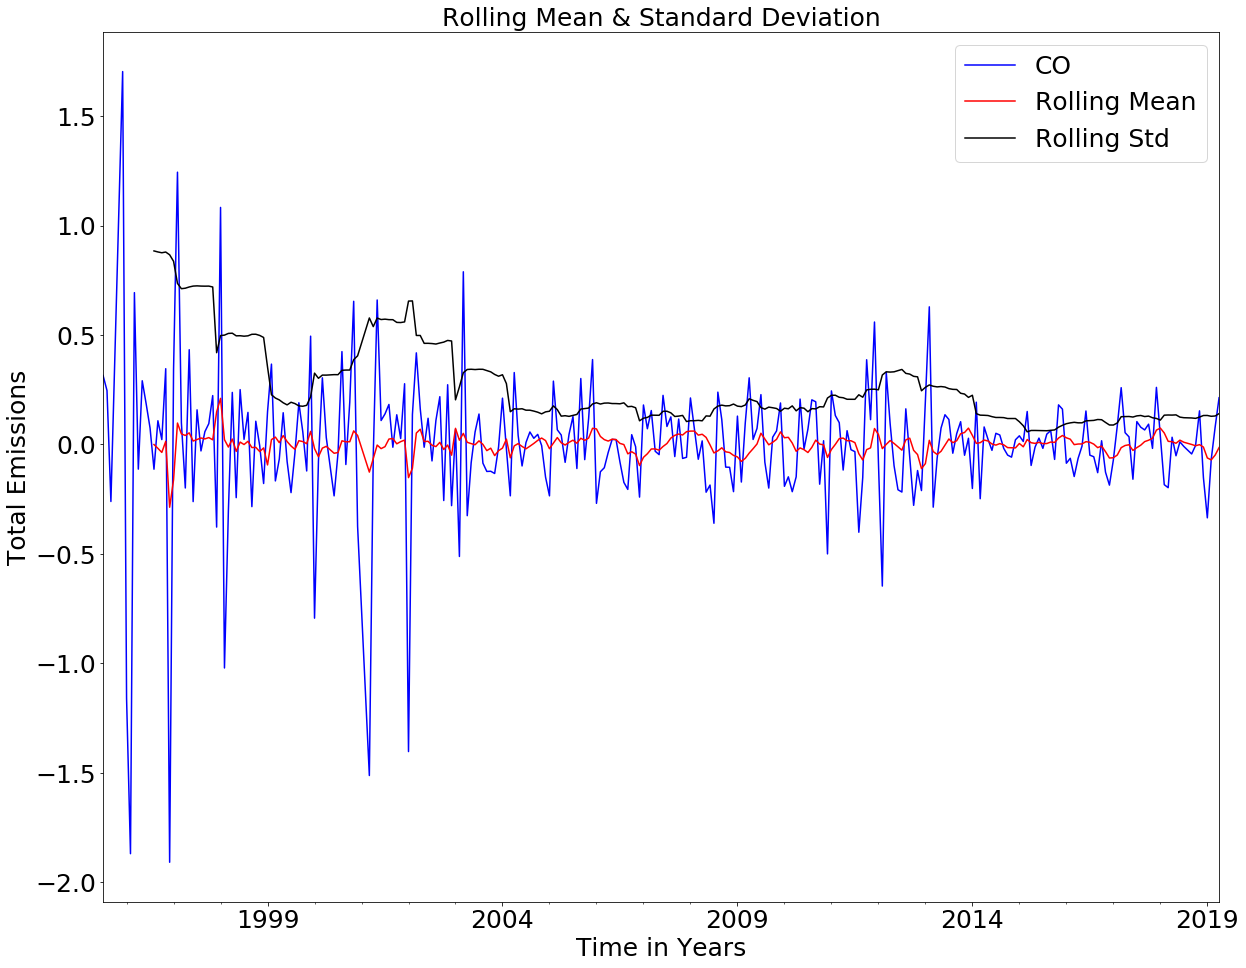

In [22]:
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(12)  
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False))

In [23]:
TestStationaryAdfuller(mte_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -7.042560e+00
p-value                        5.796111e-10
#Lags Used                     1.400000e+01
Number of Observations Used    2.650000e+02
Critical Value (1%)           -3.455270e+00
Critical Value (5%)           -2.872509e+00
Critical Value (10%)          -2.572615e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [24]:
co_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 293 entries, 1994-06 to 2019-04
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO      293 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


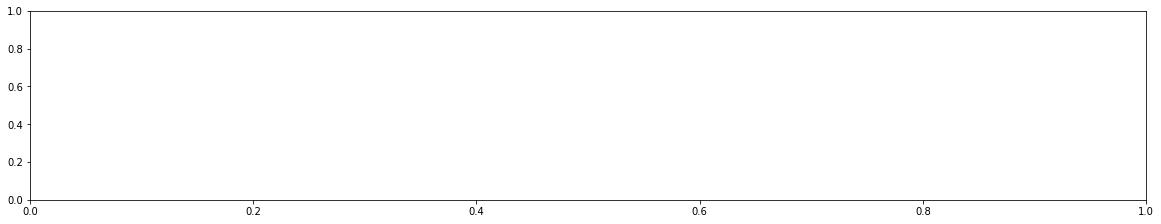

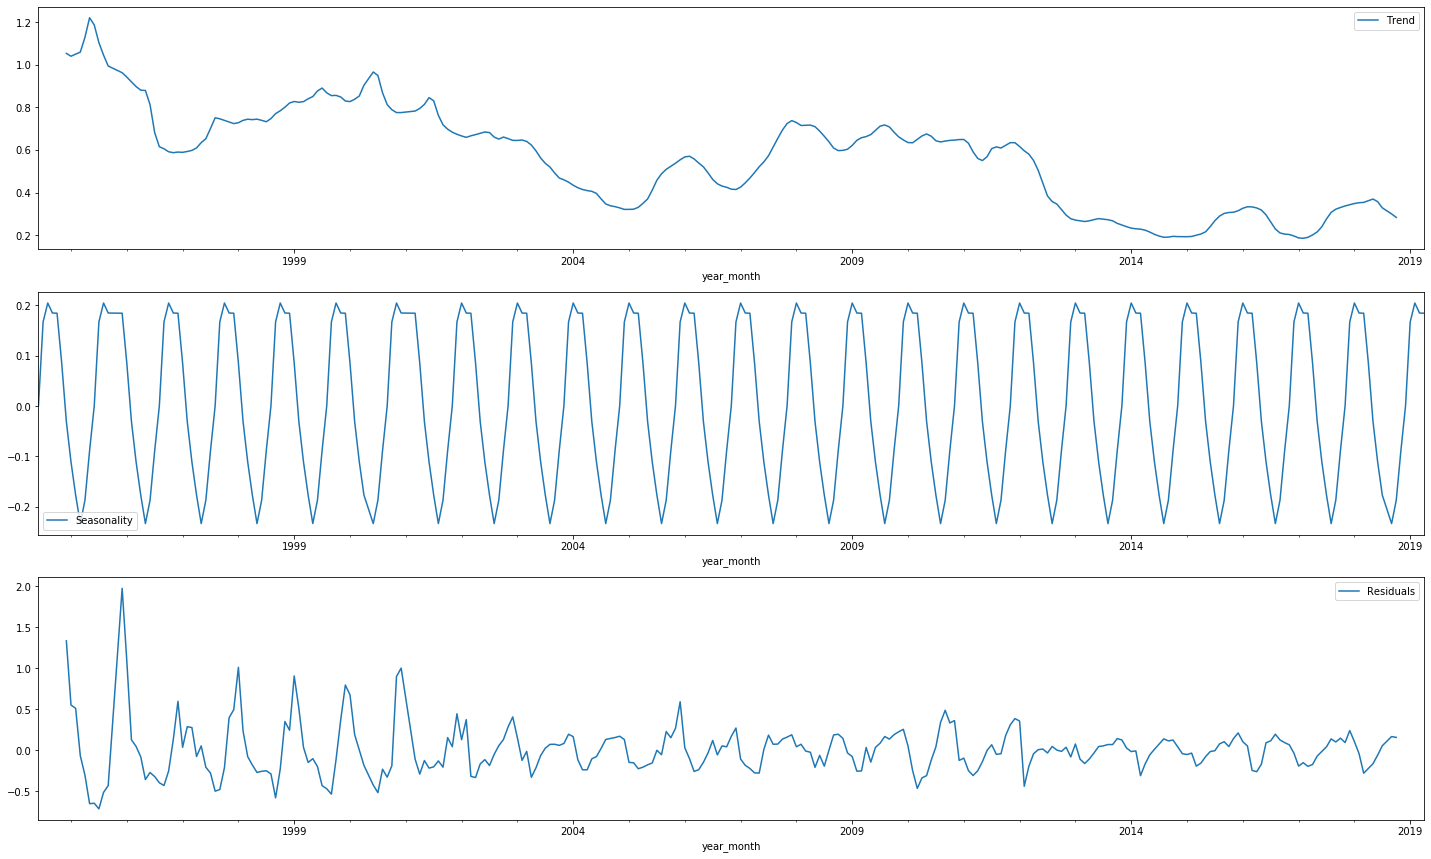

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(co_data, period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
co_data.plot(label='Original')
plt.legend(loc='best')
plt.subplot(412)
trend.plot(label='Trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot( label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

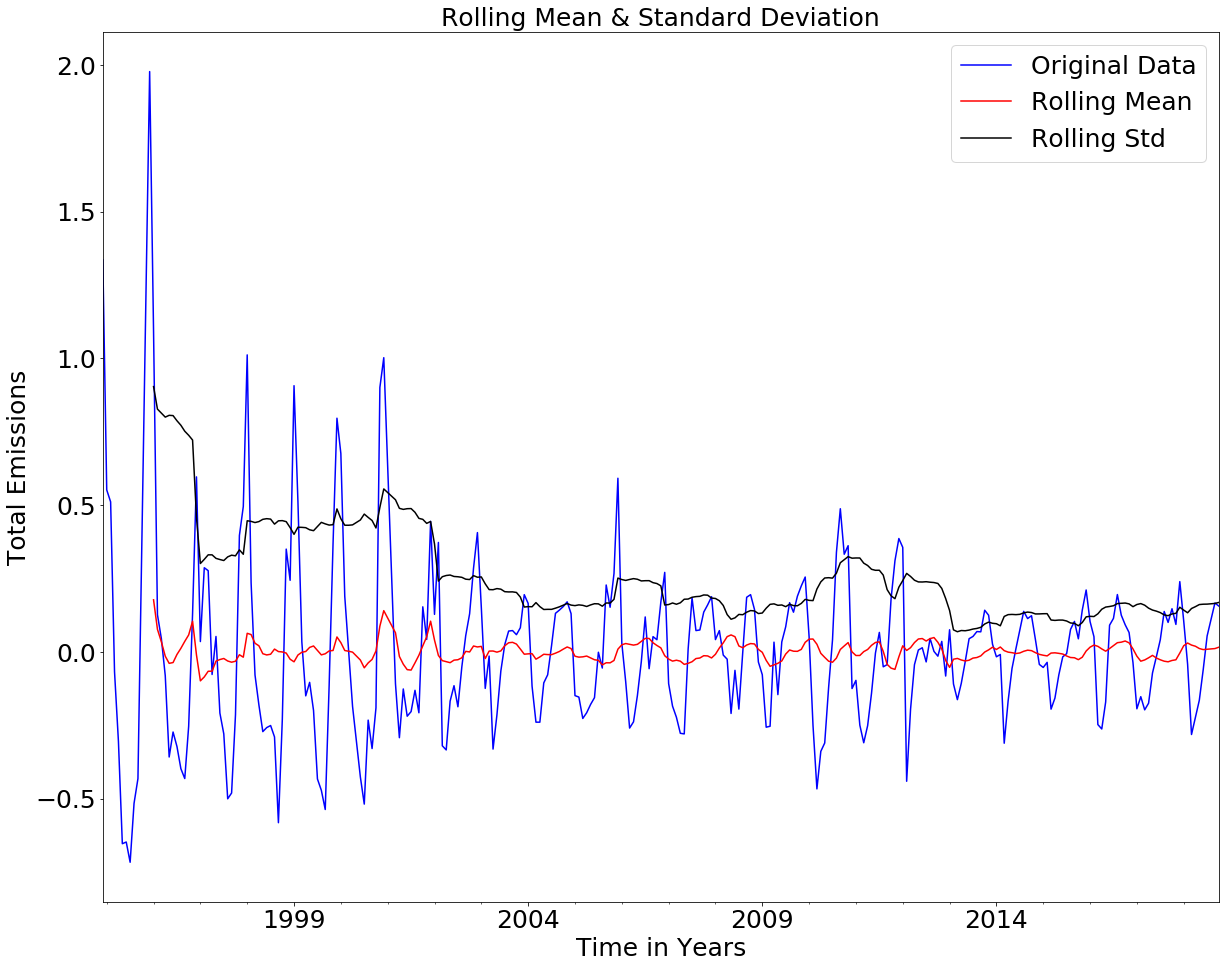

Test Statistic                -8.595644e+00
p-value                        7.089953e-14
#Lags Used                     1.200000e+01
Number of Observations Used    2.680000e+02
Critical Value (1%)           -3.454988e+00
Critical Value (5%)           -2.872386e+00
Critical Value (10%)          -2.572549e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [26]:
mte_decompose = residual
mte_decompose.dropna(inplace=True)
TestStationaryPlot(mte_decompose)
TestStationaryAdfuller(mte_decompose)

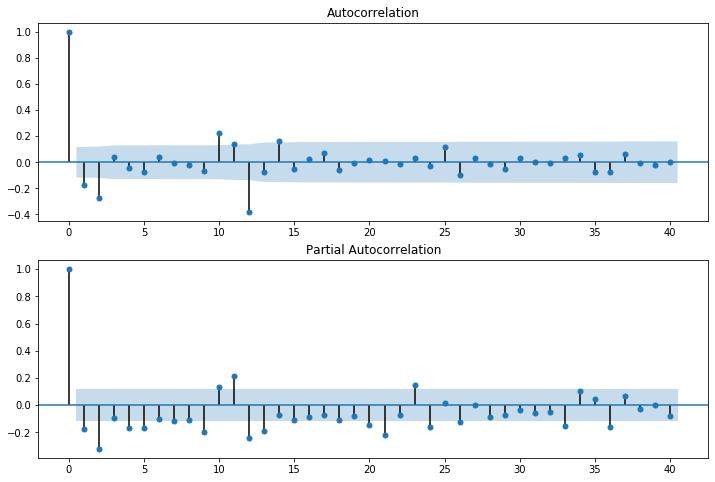

In [27]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

In [28]:
import itertools

p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [188]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(co_data,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print(param, seasonal_param, results.aic)
        except:
            continue


(0, 0, 0) (0, 0, 0, 12) 1704.094567772789
(0, 0, 0) (0, 0, 1, 12) 1149.2812921434772
(0, 0, 0) (0, 1, 0, 12) 182.253182983173
(0, 0, 0) (0, 1, 1, 12) -1.068690706523995
(0, 0, 0) (1, 0, 0, 12) 113.9057396795919
(0, 0, 0) (1, 0, 1, 12) -17.61014045226932
(0, 0, 0) (1, 1, 0, 12) 10.83447274360384


/anaconda3/envs/hw-1/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(0, 0, 0) (1, 1, 1, 12) -20.83067101948828
(0, 0, 1) (0, 0, 0, 12) 1202.8580072711725
(0, 0, 1) (0, 0, 1, 12) 797.8037309358131
(0, 0, 1) (0, 1, 0, 12) 134.8526722695708
(0, 0, 1) (0, 1, 1, 12) -33.075609033251965
(0, 0, 1) (1, 0, 0, 12) 82.42490454919667
(0, 0, 1) (1, 0, 1, 12) -65.78706059519436
(0, 0, 1) (1, 1, 0, 12) -4.870228277402873
(0, 0, 1) (1, 1, 1, 12) -58.64710915440324
(0, 1, 0) (0, 0, 0, 12) 448.3314347443269
(0, 1, 0) (0, 0, 1, 12) 291.1947445355578
(0, 1, 0) (0, 1, 0, 12) 298.51297739291334
(0, 1, 0) (0, 1, 1, 12) 101.54865426121606
(0, 1, 0) (1, 0, 0, 12) 180.08612287417867
(0, 1, 0) (1, 0, 1, 12) 44.689412806297895
(0, 1, 0) (1, 1, 0, 12) 198.4011622863424
(0, 1, 0) (1, 1, 1, 12) 97.01832815051236
(0, 1, 1) (0, 0, 0, 12) 424.0752016002207
(0, 1, 1) (0, 0, 1, 12) 273.1873605306061
(0, 1, 1) (0, 1, 0, 12) 123.51098873380252
(0, 1, 1) (0, 1, 1, 12) -68.2749630493702
(0, 1, 1) (1, 0, 0, 12) 84.86393571038647
(0, 1, 1) (1, 0, 1, 12) -154.94283875800184
(0, 1, 1) (1, 1, 0, 

In [90]:
mod = sm.tsa.statespace.SARIMAX(co_data, 
                                order=(1,1,1), 
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                 CO   No. Observations:                  293
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  12.600
Date:                            Sun, 29 Mar 2020   AIC                            -15.200
Time:                                    17:40:14   BIC                              2.718
Sample:                                06-30-1994   HQIC                            -8.001
                                     - 04-30-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5441      0.033     16.414      0.000       0.479       0.609
ma.L1         -1.0000     33.151   

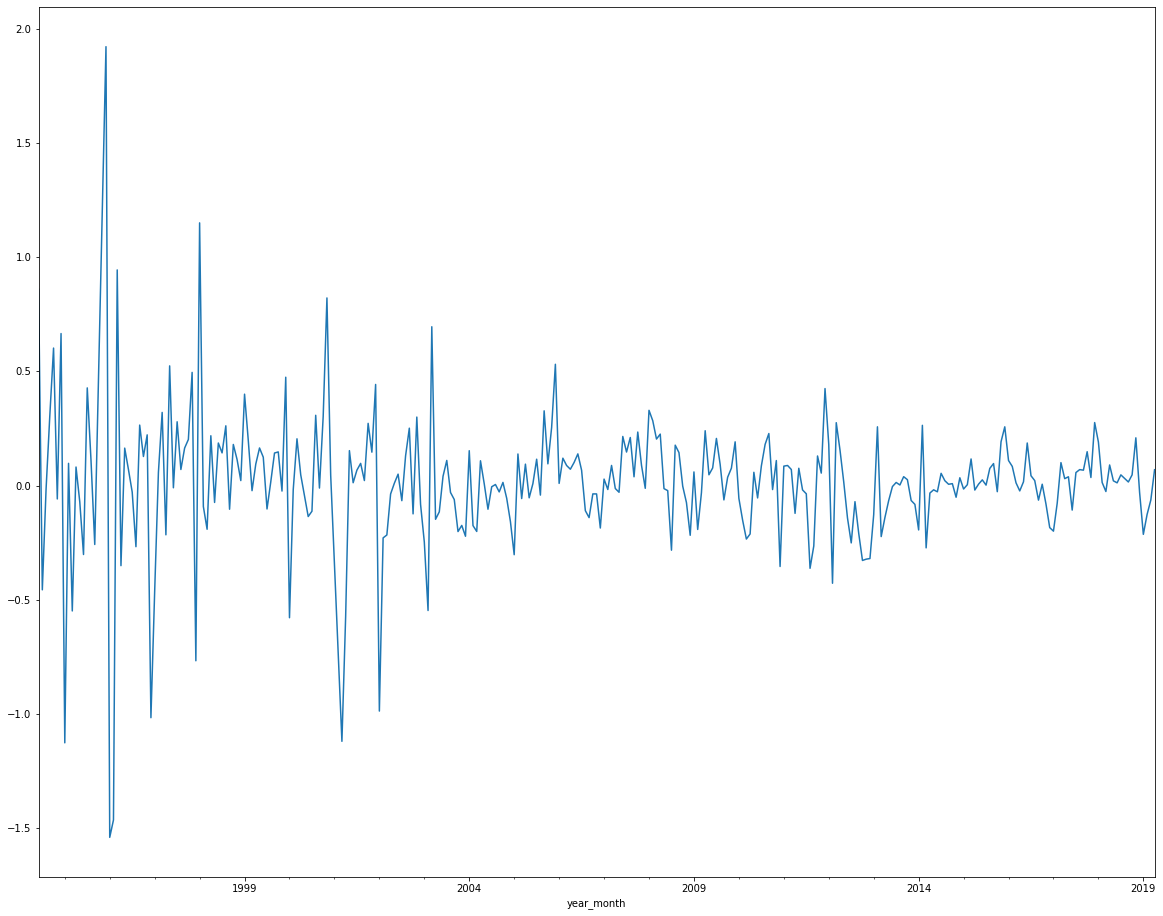

In [91]:
results.resid.plot()

In [92]:
print(results.resid.describe())

count    293.000000
mean       0.014807
std        0.307962
min       -1.540076
25%       -0.074005
50%        0.016488
75%        0.129940
max        1.921075
dtype: float64


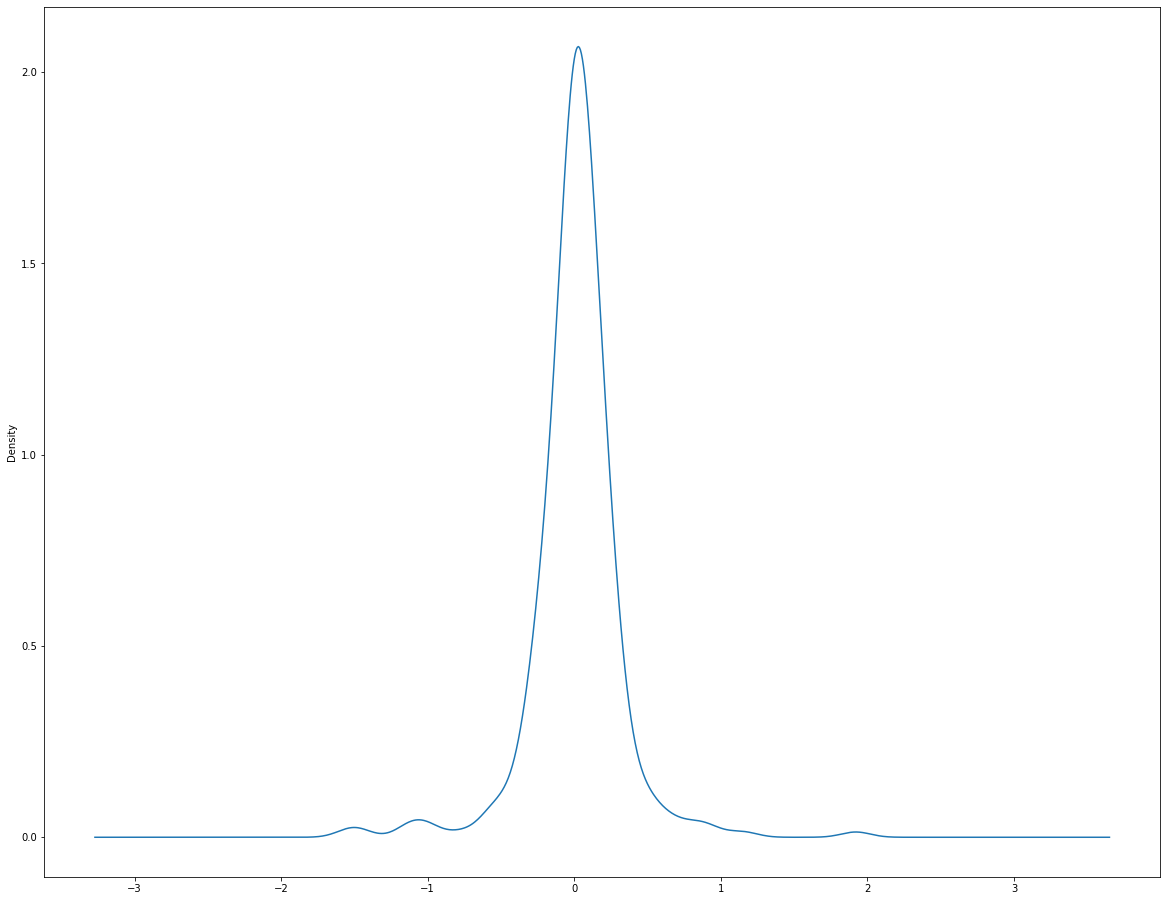

In [93]:
results.resid.plot(kind='kde')

In [94]:
pred = results.get_prediction(start = '2010',end='2030', dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower CO,upper CO
2009-08,0.496653,1.396137
2009-09,0.269807,1.169274
2009-10,0.151611,1.051062
2009-11,0.174746,1.074180
2009-12,-0.173224,0.726194


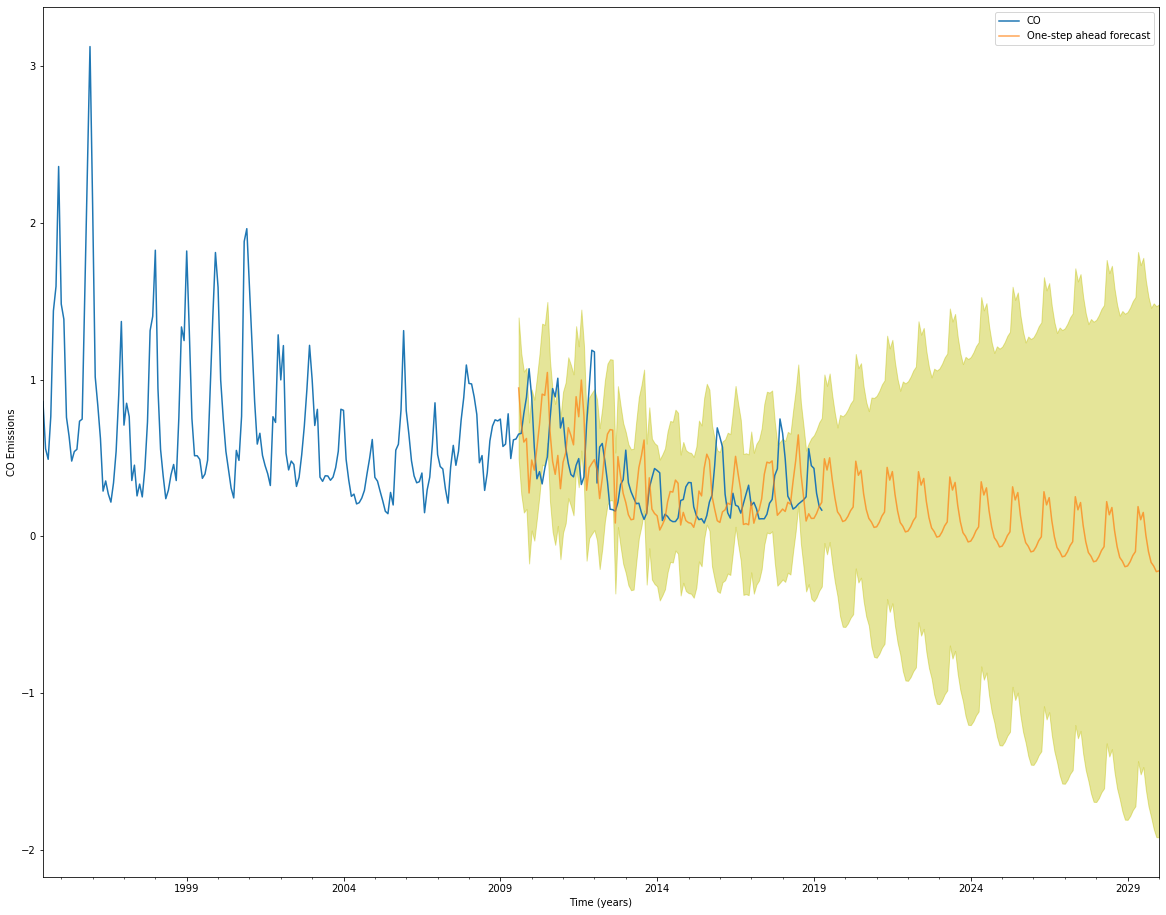

In [95]:
ax = co_data['1980':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='y', alpha=.4)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO Emissions')
plt.legend()

plt.show()

In [96]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

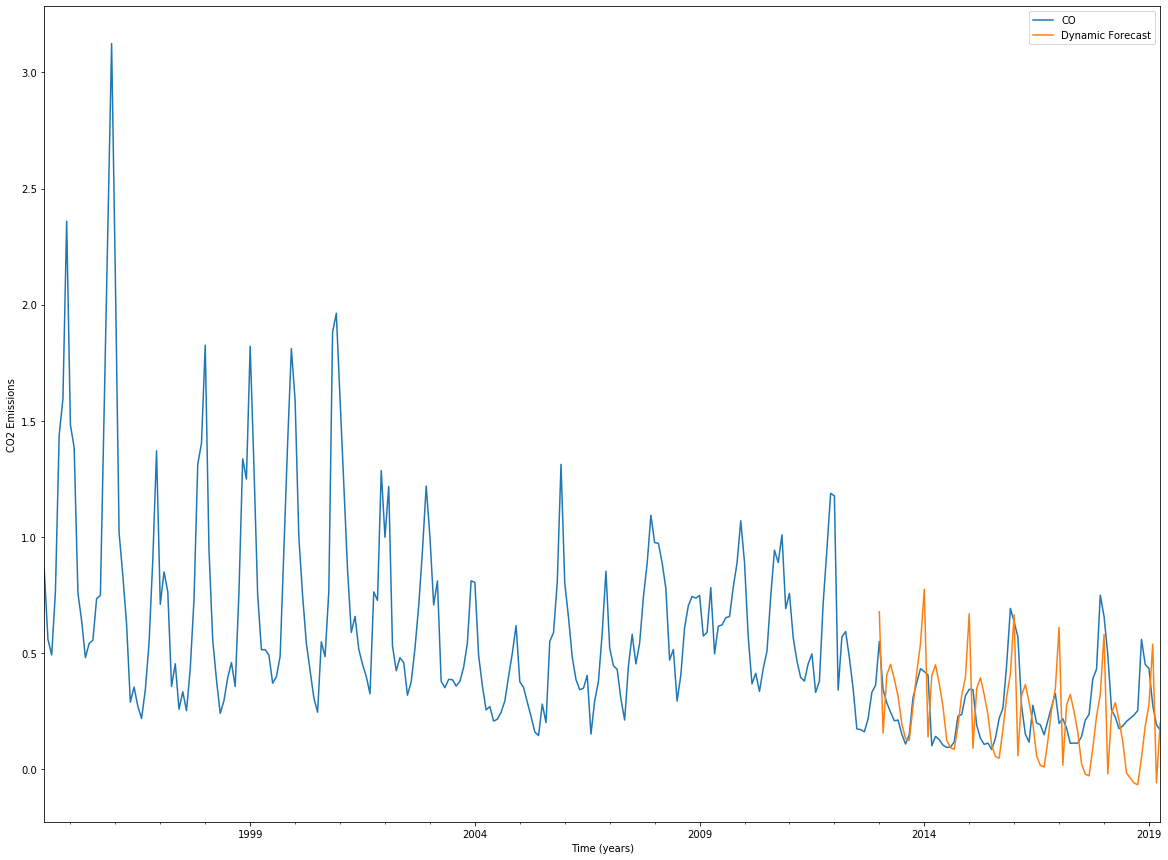

In [97]:
ax = co_data['1980':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

# ax.fill_between(pred_dynamic_ci.index,
#                 pred_dynamic_ci.iloc[:, 0],
#                 pred_dynamic_ci.iloc[:, 1], 
#                 color='r', 
#                 alpha=.3)

# ax.fill_betweenx(ax.get_ylim(), 
#                  pd.to_datetime('2013-01-01'), 
#                  co_data.index[-1],
#                  alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [98]:
# forecast = results.get_forecast(start='2019', dynamic=True, full_results=True)
forecast = results.get_forecast(steps=200)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.tail()

,lower CO,upper CO
2035-02,-2.423940,1.722101
2035-03,-2.386259,1.761993
2035-04,-2.361808,1.787515
2035-05,-2.074813,2.075053
2035-06,-2.158900,1.991251


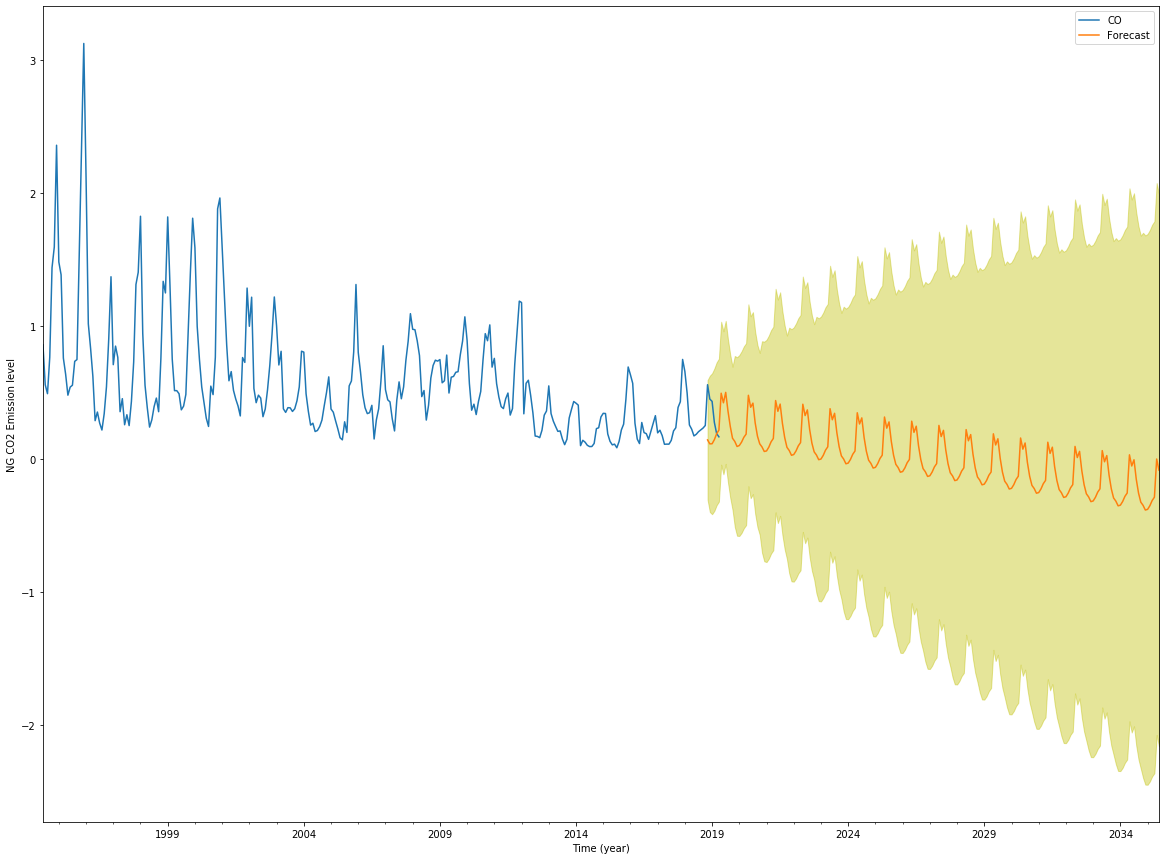

In [99]:
ax = co_data.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='y', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()